In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
from os import path
import matplotlib.ticker as ticker

labels = ["paiceHusk", "krovetz", "sStripper", "porter2", "lovins", "wikt", "none"]
collection_sizes = [1,2,4,8,16,32,64,128,256]
data_dir_2013 = path.join("Data", "clueweb-2013")

### Preparing data for Collection Size

#### n = 1

In [3]:
nERR_1 = np.loadtxt(path.join(data_dir_2013,"n-1/nERR-1"))
nDCG_1 = np.loadtxt(path.join(data_dir_2013, "n-1/nDCG-1"))
data = {"stemmer" : labels, "nERR-IA" : nERR_1, "nDCG" : nDCG_1}
n_1 = pd.DataFrame(data=data)
n_1["n"] = 1
n_1["size"] = 52342886
n_1 = n_1.melt(id_vars=["n", "size", "stemmer"]).rename({"variable" : "measure"}, axis="columns")
display(n_1)

,n,size,stemmer,measure,value
0,1,52342886,paiceHusk,nERR-IA,0.373226
1,1,52342886,krovetz,nERR-IA,0.381737
2,1,52342886,sStripper,nERR-IA,0.397822
3,1,52342886,porter2,nERR-IA,0.402487
4,1,52342886,lovins,nERR-IA,0.369489
5,1,52342886,wikt,nERR-IA,0.406883
6,1,52342886,none,nERR-IA,0.406764
7,1,52342886,paiceHusk,nDCG,0.422251
8,1,52342886,krovetz,nDCG,0.427275
9,1,52342886,sStripper,nDCG,0.447316


#### n = 2

In [4]:
nERR_2 = np.loadtxt(path.join(data_dir_2013,"n-2/nERR-2"))
nDCG_2 = np.loadtxt(path.join(data_dir_2013, "n-2/nDCG-2"))
data = {"stemmer" : labels, "nERR-IA" : nERR_2, "nDCG" : nDCG_2}
n_2 = pd.DataFrame(data=data)
n_2["n"] = 2
n_2["size"] = 26171443
n_2 = n_2.melt(id_vars=["n", "size", "stemmer"]).rename({"variable" : "measure"}, axis="columns")
display(n_2)

,n,size,stemmer,measure,value
0,2,26171443,paiceHusk,nERR-IA,0.403969
1,2,26171443,krovetz,nERR-IA,0.407025
2,2,26171443,sStripper,nERR-IA,0.432042
3,2,26171443,porter2,nERR-IA,0.423954
4,2,26171443,lovins,nERR-IA,0.404806
5,2,26171443,wikt,nERR-IA,0.448343
6,2,26171443,none,nERR-IA,0.448343
7,2,26171443,paiceHusk,nDCG,0.437447
8,2,26171443,krovetz,nDCG,0.431725
9,2,26171443,sStripper,nDCG,0.461513


#### n = 4

In [5]:
nERR_4 = np.loadtxt(path.join(data_dir_2013,"n-4/nERR-4"))
nDCG_4 = np.loadtxt(path.join(data_dir_2013, "n-4/nDCG-4"))
data = {"stemmer" : labels, "nERR-IA" : nERR_4, "nDCG" : nDCG_4}
n_4 = pd.DataFrame(data=data)
n_4["n"] = 4
n_4["size"] = 13085721
n_4 = n_4.melt(id_vars=["n", "size", "stemmer"]).rename({"variable" : "measure"}, axis="columns")
display(n_4)

,n,size,stemmer,measure,value
0,4,13085721,paiceHusk,nERR-IA,0.387215
1,4,13085721,krovetz,nERR-IA,0.356507
2,4,13085721,sStripper,nERR-IA,0.358856
3,4,13085721,porter2,nERR-IA,0.361490
4,4,13085721,lovins,nERR-IA,0.333363
5,4,13085721,wikt,nERR-IA,0.374435
6,4,13085721,none,nERR-IA,0.373834
7,4,13085721,paiceHusk,nDCG,0.407003
8,4,13085721,krovetz,nDCG,0.383660
9,4,13085721,sStripper,nDCG,0.388206


#### n = 8

In [6]:
nERR_8 = np.loadtxt(path.join(data_dir_2013,"n-8/nERR-8"))
nDCG_8 = np.loadtxt(path.join(data_dir_2013, "n-8/nDCG-8"))
data = {"stemmer" : labels, "nERR-IA" : nERR_8, "nDCG" : nDCG_8}
n_8 = pd.DataFrame(data=data)
n_8["n"] = 8
n_8["size"] = 6542860
n_8 = n_8.melt(id_vars=["n", "size", "stemmer"]).rename({"variable" : "measure"}, axis="columns")
display(n_8)

,n,size,stemmer,measure,value
0,8,6542860,paiceHusk,nERR-IA,0.318360
1,8,6542860,krovetz,nERR-IA,0.293782
2,8,6542860,sStripper,nERR-IA,0.305814
3,8,6542860,porter2,nERR-IA,0.306537
4,8,6542860,lovins,nERR-IA,0.274949
5,8,6542860,wikt,nERR-IA,0.306018
6,8,6542860,none,nERR-IA,0.306018
7,8,6542860,paiceHusk,nDCG,0.339796
8,8,6542860,krovetz,nDCG,0.319586
9,8,6542860,sStripper,nDCG,0.333378


#### n = 16

In [7]:
nERR_16 = np.loadtxt(path.join(data_dir_2013,"n-16/nERR-16"))
nDCG_16 = np.loadtxt(path.join(data_dir_2013, "n-16/nDCG-16"))
data = {"stemmer" : labels, "nERR-IA" : nERR_16, "nDCG" : nDCG_16}
n_16 = pd.DataFrame(data=data)
n_16["n"] = 16
n_16["size"] = 3271430
n_16 = n_16.melt(id_vars=["n", "size", "stemmer"]).rename({"variable" : "measure"}, axis="columns")
display(n_16)

,n,size,stemmer,measure,value
0,16,3271430,paiceHusk,nERR-IA,0.233961
1,16,3271430,krovetz,nERR-IA,0.237169
2,16,3271430,sStripper,nERR-IA,0.233996
3,16,3271430,porter2,nERR-IA,0.249076
4,16,3271430,lovins,nERR-IA,0.226598
5,16,3271430,wikt,nERR-IA,0.234590
6,16,3271430,none,nERR-IA,0.234590
7,16,3271430,paiceHusk,nDCG,0.240461
8,16,3271430,krovetz,nDCG,0.247315
9,16,3271430,sStripper,nDCG,0.247835


#### n = 32

In [8]:
nERR_32 = np.loadtxt(path.join(data_dir_2013,"n-32/nERR-32"))
nDCG_32 = np.loadtxt(path.join(data_dir_2013, "n-32/nDCG-32"))
data = {"stemmer" : labels, "nERR-IA" : nERR_32, "nDCG": nDCG_32}
n_32 = pd.DataFrame(data=data)
n_32["n"] = 32
n_32["size"] = 1635715
n_32 = n_32.melt(id_vars=["n", "size", "stemmer"]).rename({"variable": "measure"}, axis="columns")
display(n_32)

,n,size,stemmer,measure,value
0,32,1635715,paiceHusk,nERR-IA,0.138853
1,32,1635715,krovetz,nERR-IA,0.140136
2,32,1635715,sStripper,nERR-IA,0.145941
3,32,1635715,porter2,nERR-IA,0.153883
4,32,1635715,lovins,nERR-IA,0.130412
5,32,1635715,wikt,nERR-IA,0.154361
6,32,1635715,none,nERR-IA,0.154361
7,32,1635715,paiceHusk,nDCG,0.141425
8,32,1635715,krovetz,nDCG,0.140740
9,32,1635715,sStripper,nDCG,0.151988


#### n = 64

In [9]:
nERR_64 = np.loadtxt(path.join(data_dir_2013,"n-64/nERR-64"))
nDCG_64 = np.loadtxt(path.join(data_dir_2013, "n-64/nDCG-64"))
data = {"stemmer" : labels, "nERR-IA" : nERR_64, "nDCG": nDCG_64}
n_64 = pd.DataFrame(data=data)
n_64["n"] = 64
n_64["size"] = 817857
n_64 = n_64.melt(id_vars=["n", "size", "stemmer"]).rename({"variable": "measure"}, axis="columns")
display(n_64)

,n,size,stemmer,measure,value
0,64,817857,paiceHusk,nERR-IA,0.075932
1,64,817857,krovetz,nERR-IA,0.103030
2,64,817857,sStripper,nERR-IA,0.093754
3,64,817857,porter2,nERR-IA,0.105434
4,64,817857,lovins,nERR-IA,0.089082
5,64,817857,wikt,nERR-IA,0.101233
6,64,817857,none,nERR-IA,0.101233
7,64,817857,paiceHusk,nDCG,0.076873
8,64,817857,krovetz,nDCG,0.099507
9,64,817857,sStripper,nDCG,0.090379


#### n = 128

In [10]:
nERR_128 = np.loadtxt(path.join(data_dir_2013,"n-128/nERR-128"))
nDCG_128 = np.loadtxt(path.join(data_dir_2013, "n-128/nDCG-128"))
data = {"stemmer" : labels, "nERR-IA" : nERR_128, "nDCG": nDCG_128}
n_128 = pd.DataFrame(data=data)
n_128["n"] = 128
n_128["size"] = 408928
n_128 = n_128.melt(id_vars=["n", "size", "stemmer"]).rename({"variable": "measure"}, axis="columns")
display(n_128)

,n,size,stemmer,measure,value
0,128,408928,paiceHusk,nERR-IA,0.024881
1,128,408928,krovetz,nERR-IA,0.034701
2,128,408928,sStripper,nERR-IA,0.026525
3,128,408928,porter2,nERR-IA,0.039510
4,128,408928,lovins,nERR-IA,0.023158
5,128,408928,wikt,nERR-IA,0.027529
6,128,408928,none,nERR-IA,0.027529
7,128,408928,paiceHusk,nDCG,0.027293
8,128,408928,krovetz,nDCG,0.033905
9,128,408928,sStripper,nDCG,0.028236


#### n = 256

In [11]:
nERR_256 = np.loadtxt(path.join(data_dir_2013,"n-256/nERR-256"))
nDCG_256 = np.loadtxt(path.join(data_dir_2013, "n-256/nDCG-256"))
data = {"stemmer" : labels, "nERR-IA" : nERR_256, "nDCG": nDCG_256}
n_256 = pd.DataFrame(data=data)
n_256["n"] = 256
n_256["size"] = 204464
n_256 = n_256.melt(id_vars=["n", "size", "stemmer"]).rename({"variable": "measure"}, axis="columns")
display(n_256)

,n,size,stemmer,measure,value
0,256,204464,paiceHusk,nERR-IA,0.028857
1,256,204464,krovetz,nERR-IA,0.030461
2,256,204464,sStripper,nERR-IA,0.030661
3,256,204464,porter2,nERR-IA,0.043286
4,256,204464,lovins,nERR-IA,0.028857
5,256,204464,wikt,nERR-IA,0.030461
6,256,204464,none,nERR-IA,0.030461
7,256,204464,paiceHusk,nDCG,0.025991
8,256,204464,krovetz,nDCG,0.029902
9,256,204464,sStripper,nDCG,0.030090


#### Merge

In [12]:
clueweb_2013 = pd.concat([n_1,n_2,n_4,n_8,n_16,n_32,n_64,n_128,n_256], ignore_index=True)
display(clueweb_2013)

,n,size,stemmer,measure,value
0,1,52342886,paiceHusk,nERR-IA,0.373226
1,1,52342886,krovetz,nERR-IA,0.381737
2,1,52342886,sStripper,nERR-IA,0.397822
3,1,52342886,porter2,nERR-IA,0.402487
4,1,52342886,lovins,nERR-IA,0.369489
...,...,...,...,...,...
121,256,204464,sStripper,nDCG,0.030090
122,256,204464,porter2,nDCG,0.038986
123,256,204464,lovins,nDCG,0.025991
124,256,204464,wikt,nDCG,0.029902


### nERR-IA 

In [15]:
nERR = clueweb_2013[clueweb_2013["measure"]=="nERR-IA"]

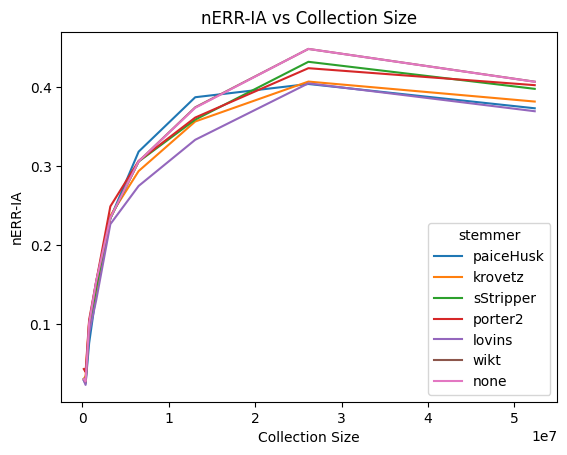

In [16]:
sns.lineplot(x="size", y="value", hue="stemmer", data=nERR) #palette=sns.color_palette("Paired")[:len(labels)]
plt.title("nERR-IA vs Collection Size")
plt.xlabel("Collection Size")
plt.ylabel("nERR-IA")
plt.show()

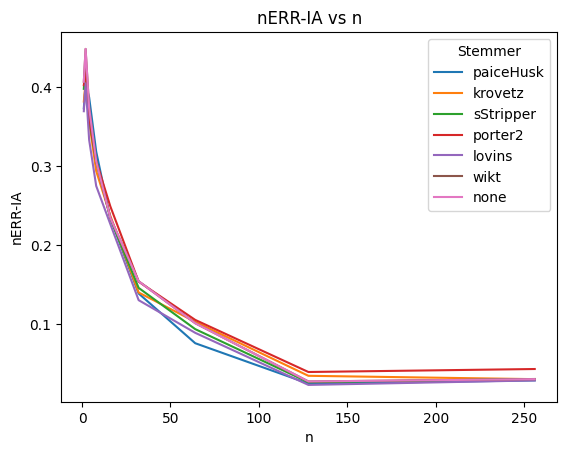

In [105]:
sns.lineplot(x="n", y="value", hue="stemmer", data=nERR) #palette=sns.color_palette("Paired")[:len(labels)]
plt.title("nERR-IA vs n")
plt.xlabel("n")
plt.ylabel("nERR-IA")
plt.show()

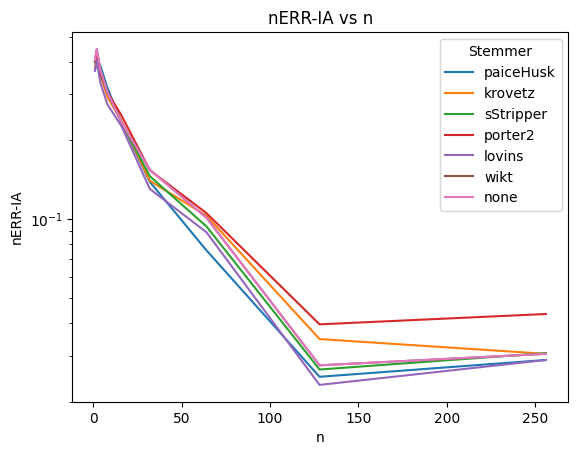

In [132]:
sns.lineplot(x="n", y="value", hue="stemmer", data=nERR) #palette=sns.color_palette("Paired")[:len(labels)]
plt.yscale("log")
plt.title("nERR-IA vs n")
plt.xlabel("n")
plt.ylabel("nERR-IA")
plt.show()

#### Individual line graphs...

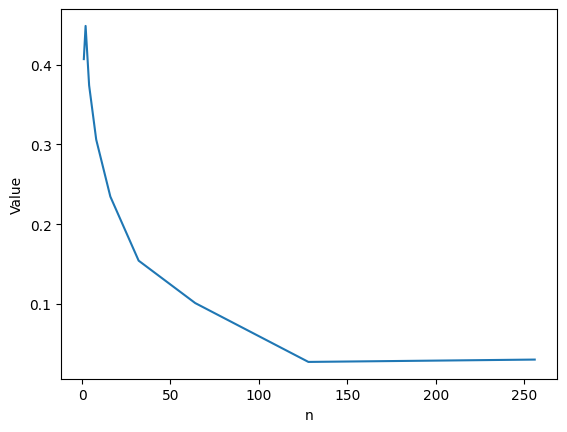

In [133]:
none = nERR[nERR["Stemmer"]=="none"]
sns.lineplot(x="n", y="Value", data=none) #palette=sns.color_palette("Paired")[:len(labels)]
plt.show()

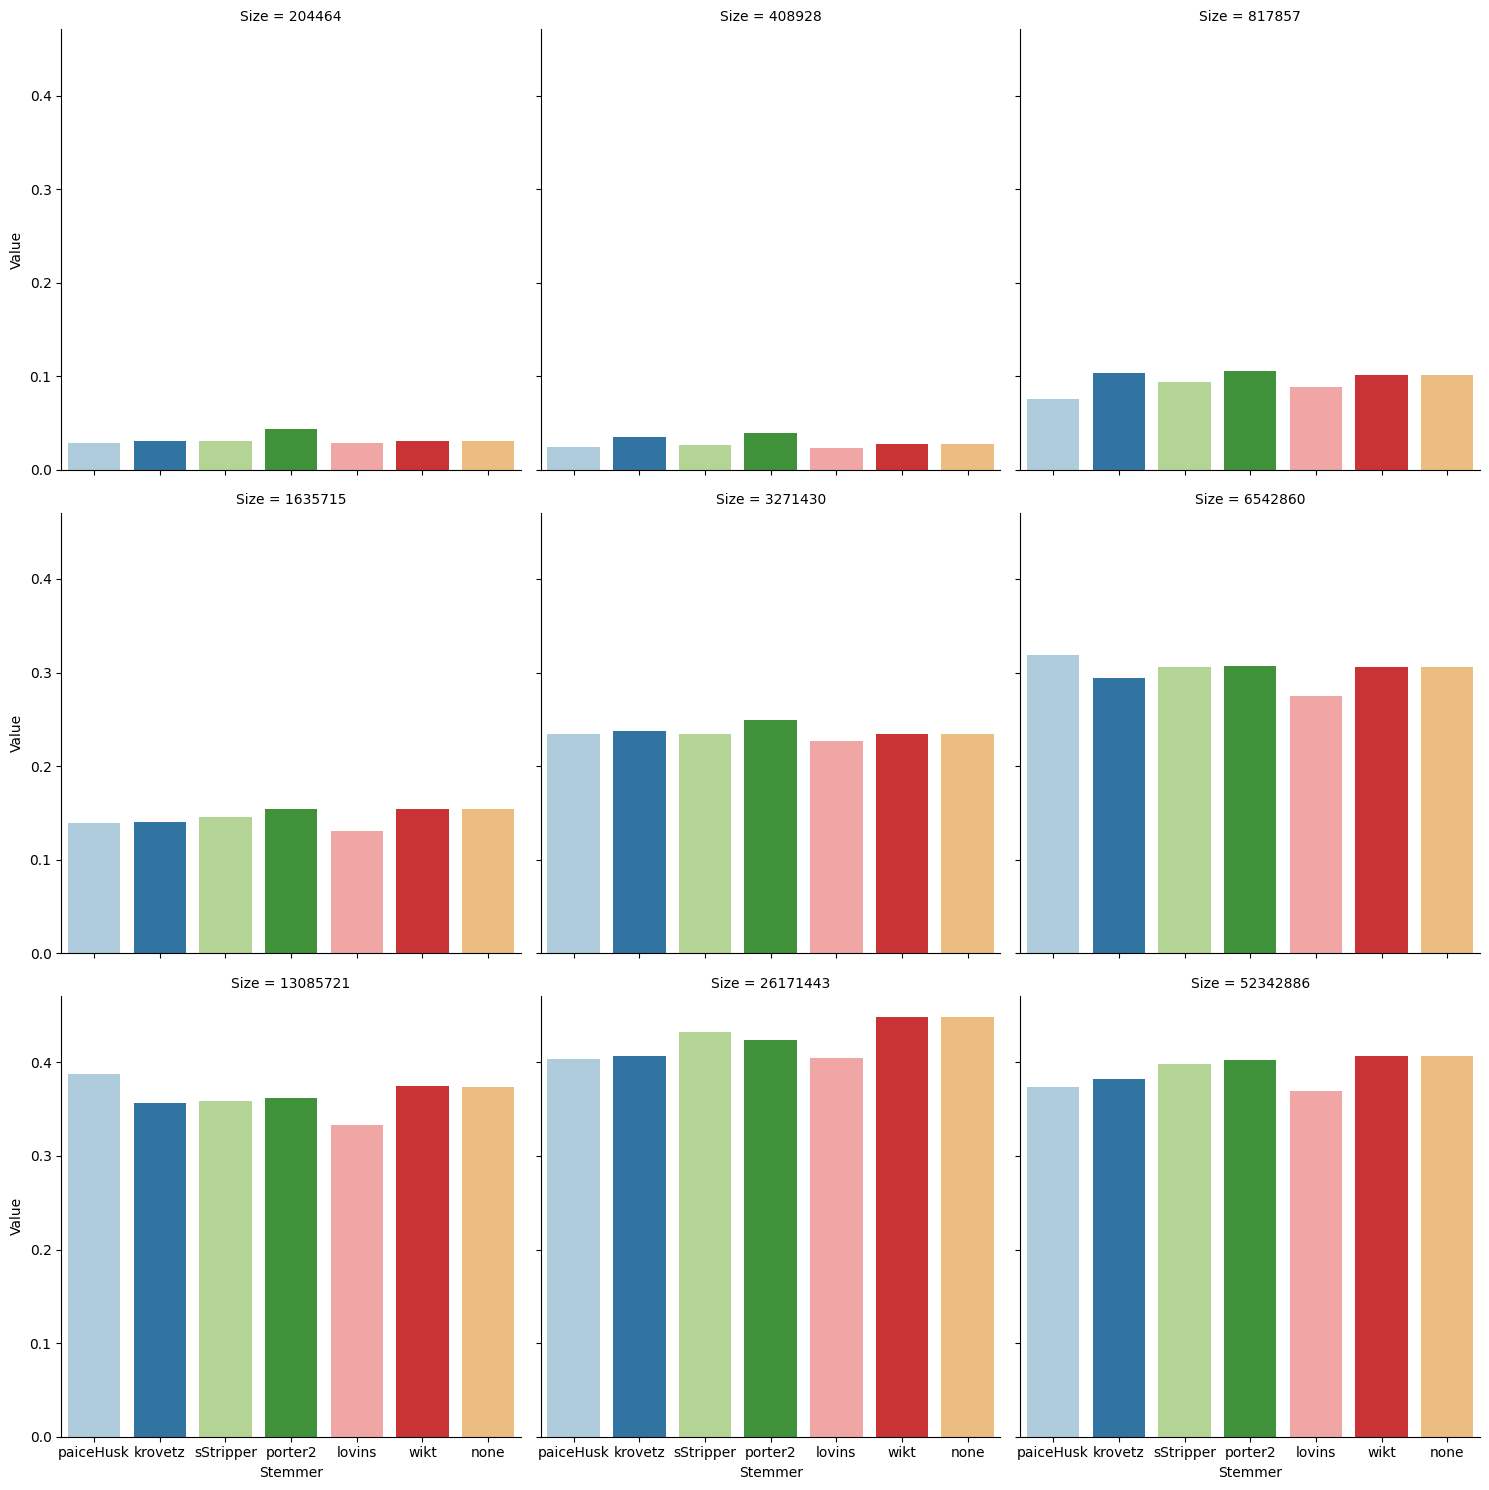

In [130]:
sns.catplot(data=nERR, kind="bar", x="stemmer", y="value", col="size", col_wrap=3, palette=sns.color_palette("Paired")[:len(labels)])
plt.show()

### nDCG

In [17]:
nDCG = clueweb_2013[clueweb_2013["measure"]=="nDCG"]

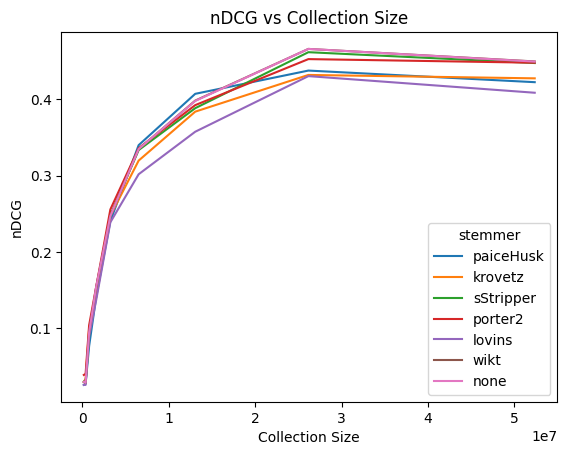

In [18]:
sns.lineplot(x="size", y="value", hue="stemmer", data=nDCG) #palette=sns.color_palette("Paired")[:len(labels)]
plt.title("nDCG vs Collection Size")
plt.xlabel("Collection Size")
plt.ylabel("nDCG")
plt.show()

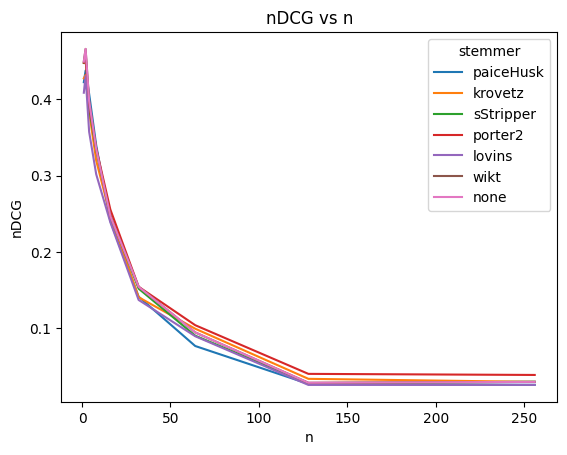

In [21]:
sns.lineplot(x="n", y="value", hue="stemmer", data=nDCG) #palette=sns.color_palette("Paired")[:len(labels)]
plt.title("nDCG vs n")
plt.xlabel("n")
plt.ylabel("nDCG")
plt.show()

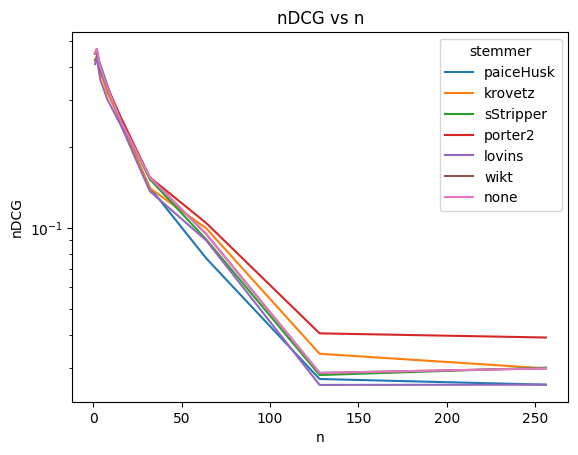

In [22]:
sns.lineplot(x="n", y="value", hue="stemmer", data=nDCG) #palette=sns.color_palette("Paired")[:len(labels)]
plt.yscale("log")
plt.title("nDCG vs n")
plt.xlabel("n")
plt.ylabel("nDCG")
plt.show()